## How to solve this entry test?

This test uses a python module that permits us to grade your code automatically.
Each exercise uses a *function* to evaluate your code.

A *function* is a block of code which runs when it is called. It accepts input parameters and it can return data as a result. *Functions* are defined with the keyword `def`. Example:

```python
def function(input_value):
    # do something with the input
    output_value = input_value
    return output_value
```

To do these tasks you have to write your code after the doc string comment and run each of the cells. Remember to take care of the indentation (4 spaces).

### Task 1

### Fibonacci numbers
$$ {F_n} = {F_{n-1}} + F_{n-2} $$
where $$F_0 = 0$$ and $$F_1 = 1 $$

The beginning of the sequence: 0,1,1,2,3,5,8,... <br>
https://en.wikipedia.org/wiki/Fibonacci_number

**write a function that**:
- for a given integer number returns which Fibonacci number it is
  for example, 2 is the third Fibonacci number; 5 is the 5th, 8 is the 6th)
- returns None, if not a Fibonacci number


In [1]:
# write a function that for a given integer number returns which Fibonacci number it is
# for example, 2 is the third Fibonacci number; 5 is the 5th, 8 is the 6th)
# if not a Fibonacci number, return None
def check_if_Fib(n):
    """
    input n - integer
    output - integer
    if an input number is not a Fibonacci number, return None
    
    Note: even though 1 is both the first and second Fib number, return 1"""
    ### BEGIN SOLUTION 
    fib_num = [0,1]
    if n in fib_num:
        return fib_num.index(n)
    c = 1
    while fib_num[-1] < n:
        Fn_2 = fib_num.pop(0)
        fib_num.append(fib_num[0] + Fn_2)
        c+=1
    if n == fib_num[-1]:
        return c
    else:return None
    ### END SOLUTION

In [2]:
# check your solution
check_if_Fib(0), check_if_Fib(1), check_if_Fib(2), check_if_Fib(3), check_if_Fib(4)
# expected result
# (0, 1, 3, 4, None)

(0, 1, 3, 4, None)

In [3]:
# grading your solution
assert check_if_Fib(0) == 0
assert check_if_Fib(4) is None
### BEGIN HIDDEN TESTS
def solution_fnc_check_if_Fib(n):
    fib_num = [0,1]
    if n in fib_num:
        return fib_num.index(n)
    c = 1
    while fib_num[-1] < n:
        Fn_2 = fib_num.pop(0)
        fib_num.append(fib_num[0] + Fn_2)
        c+=1
    if n == fib_num[-1]:
        return c
    else:return None

for i in range(20):
    assert check_if_Fib(i) == solution_fnc_check_if_Fib(i)
### END HIDDEN TESTS

### Task 2

### FASTA information

"In bioinformatics and biochemistry, the FASTA format is a text-based format for representing either nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes." 

"The description line (defline) or header/identifier line, which begins with '>', gives a name and/or a unique identifier for the sequence, and may also contain additional information." [https://en.wikipedia.org/wiki/FASTA_format]

UniProt is a freely accessible database of protein sequence and functional information, many entries being derived from genome sequencing projects. It contains a large amount of information about the biological function of proteins derived from the research literature. [https://en.wikipedia.org/wiki/UniProt]

The format of the Uniprot Fasta headers is:

    >db|UniqueIdentifier|EntryName ProteinName OS=OrganismName OX=OrganismIdentifier [GN=GeneName ]PE=ProteinExistence SV=SequenceVersion

[https://www.uniprot.org/help/fasta-headers]

**write a function that**:

- gets a list of the Organism Names `OrganismName` from a given fasta file `fasta`


In [4]:
%%writefile viruses.fa
>sp|P23046|NSP5_ROTBV Non-structural protein 5 OS=Rotavirus A (isolate RVA/Cow/United States/VMRI/1988/G6P[5]) OX=10935 PE=3 SV=1
MSLSIDVTSLPSFSSSIYKNESSATASTLSGKSIGRSVQYVSPDAEAFSKYMLSKSPEDI
GPSDSASNDPLTSFSIRSNAVKTNADAGVSMDSSVQSRPSINVGCDQVDFSFNKGIKVNA
NLDSSISVSTNSRKEKSKGDRKSRKHYPKIEAESDSDEYVLDDSDSDDGKCRNCKYKRKY
FALRMRMKQVAMQLIEDL
>sp|Q81835|SHDAG_HDVU2 Small delta antigen OS=Hepatitis delta virus genotype I (isolate US-2) OX=261991 PE=3 SV=2
MSRSESKKNRGGREEILEQWVGARKKLEELERDLRKIKKKIKKLEEENPWLGNIKGILGK
KDREGEGAPPAKRARADQMEVDSGPRKRPFRGEFTDKERRDHRRRKALENKRKQLSSGGK
SLSKEEEEELRKLTEEDERRERRVAGPRVGGVNPLEGGTRGAPGGGFVPSMQGVPESPFA
RTGEGLDVRGNQGFP
>sp|A5HBD7|ST_POVWU Small t antigen OS=WU polyomavirus OX=440266 PE=3 SV=1
MDKTLSRNEAKELMQLLGLDMTCWGNLPLMRTKYLSKCKEFHPDKGGNEEKMKKLNSLYL
KLQECVSTVHQLNEEEDEVWSSSQVECTELCCNFPPRKYRLVGEVYGDVFEEYILKDWDI
CLKGFYYLCNCFYCFLDKRHKQKYKIFRKPPMWIECYCYRCYREWFGFEISAETFFYWKK
IIFLTTMQGVGLTR
>sp|Q91FT8|234R_IIV6 Uncharacterized protein 234R OS=Invertebrate iridescent virus 6 OX=176652 GN=IIV6-234R PE=4 SV=1
MNRSDKITLDQIKKLVPINADLINFAADVKVSAATDNPFLMAVVSQDMLESTTELPYKSI
QKQVSLTVRNDNNVYQPYVLVLKSDFPQEAIVTINLQETPLVTASGCGRQTTIYPPALNG
NGNGNGNGVVAPAYVSAVGGAPTDDTTQWYKDWRYWAVIALIAAVLIYLYMKSKKGSGEE
QPVVIEMSRYSNA

Overwriting viruses.fa


In [5]:
import re

# write a function that parses fasta file format and extracts organism names of all entries
def get_organism_names(fasta):
    """
    input - fasta - file name (string)
    outpur - list of organisms (strings)"""
    ### BEGIN SOLUTION 
    names = []
    with open(fasta, "r") as file:
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                match = re.search(".*?OS=(.*?) OX", line)
                names.append(match.group(1))
    return names
    ### END SOLUTION 

In [6]:
# check your results
print(get_organism_names("viruses.fa"))
# expected result
"""
['Rotavirus A (isolate RVA/Cow/United States/VMRI/1988/G6P[5])',
'Hepatitis delta virus genotype I (isolate US-2)',
'WU polyomavirus',
'Invertebrate iridescent virus 6']
"""

['Rotavirus A (isolate RVA/Cow/United States/VMRI/1988/G6P[5])', 'Hepatitis delta virus genotype I (isolate US-2)', 'WU polyomavirus', 'Invertebrate iridescent virus 6']


"\n['Rotavirus A (isolate RVA/Cow/United States/VMRI/1988/G6P[5])',\n'Hepatitis delta virus genotype I (isolate US-2)',\n'WU polyomavirus',\n'Invertebrate iridescent virus 6']\n"

In [7]:
# grading your results
assert get_organism_names("viruses.fa")[0] == 'Rotavirus A (isolate RVA/Cow/United States/VMRI/1988/G6P[5])'
### BEGIN HIDDEN TESTS
assert get_organism_names("viruses.fa") == ['Rotavirus A (isolate RVA/Cow/United States/VMRI/1988/G6P[5])', 'Hepatitis delta virus genotype I (isolate US-2)', 'WU polyomavirus', 'Invertebrate iridescent virus 6']
### END HIDDEN TESTS

### Task 3

### Linear regression

Calculate the linear regression of data.
To generate the data needed run the cell below.
This can take some seconds.

**write a function that**:
- fits the line
- calculates the slope, intercept and $R^2$
- plot the fitted line

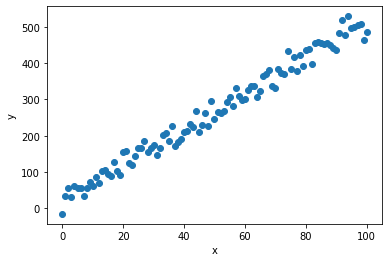

In [8]:
from matplotlib import pyplot as plt
import numpy as np

# run this cell to generate the data used for fitting
np.random.seed(100)
x = np.linspace(0,100,101)
y = 5*x + 21 + np.random.randn(101) * 21

plt.scatter(x, y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In [9]:
from scipy.stats import linregress

def get_linear_regression(x, y):
    """
    input - x and y arrays
    output - slope, intercept, R^2 (all float)
            
            additionally, generate a plot with input data and fitted curve
                (this can be done within the function or in an additional cell)
    """
    ### BEGIN SOLUTION
    xlin = np.linspace(x.min(), x.max(), 2)
    
    plt.scatter(x, y)
    plt.ylabel("y")
    plt.xlabel("x")
    
    lr = linregress(x, y)
    slope, intercept, r2 = lr.slope, lr.intercept, lr.rvalue*lr.rvalue
    
    params_of_interest = slope, intercept, r2
    line1 = '$y = {:.1f}x + {:.1f}$'
    line2 = '$r^2 = {:.2f}$'
    template_text = line1 + '\n' + line2
    plt.text(10, 400, template_text.format(*params_of_interest))
    
    plt.plot(xlin, xlin*lr.slope + lr.intercept, color="black", linewidth=3.)
    #plt.savefig("linregress.png")
    plt.show()
    return slope, intercept, r2
    ### END SOLUTION

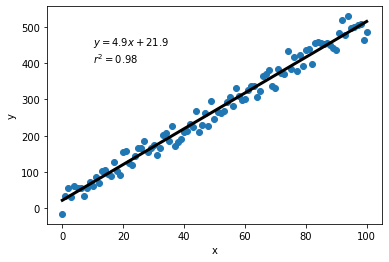

(4.93188834965833, 21.885325404276443, 0.9801946328296581)

In [10]:
# check your results
get_linear_regression(x, y) # (4.93188834965833, 21.885325404276443, 0.9801946328296581)

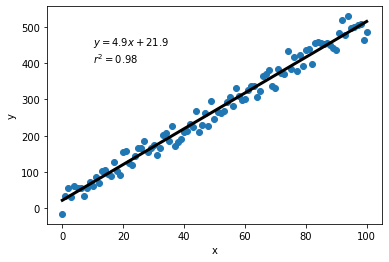

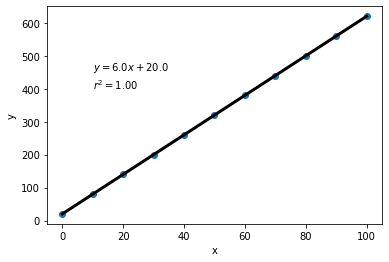

In [11]:
# grading your results
slope, intercept, r2 = get_linear_regression(x, y)
np.testing.assert_almost_equal([slope, intercept, r2], [4.931, 21.885, 0.980], 3)
### BEGIN HIDDEN TESTS
np.random.seed(100)
test_x = np.linspace(0,100,11)
test_y = 6*test_x + 20
test_slope, test_intercept, test_r2 = get_linear_regression(test_x, test_y)
np.testing.assert_almost_equal([test_slope, test_intercept, test_r2], (6, 20, 1), 3)
### END HIDDEN TESTS

Plot should look **like** this: 
    
<img src="linregress.png" alt="Drawing"/>

### Task 4

### Body Mass Index database

Curate a database containing information about the weight (Kg) and height (cm) of different persons. Open the file using `pandas`. Rename/Translate the columns to english. Remove incompleted data (See `dropna` function). Use capitalize for names and surnames (See `str.capitalize` function). 
And finally, create a new column containing the Body Mass Index (BMI).

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.

$$\mathrm{BMI} = \frac{\text{mass}_\text{kg}}{{\text{height}_\text{m}}^2}$$

[https://en.wikipedia.org/wiki/Body_mass_index]

In [12]:
%%writefile person_data.txt
NACHNAME;Vorname;Größe;Gewicht
REED;David;185;80.0
JONES;Stephen;190;91
WATSON;cynthia;174;73.0
SMITH;Stephanie;149;52
CARTER;Randy;;73
GREEN;;184;82
MORGAN;Jessie;175;75
CARTER;katherine

Overwriting person_data.txt


In [13]:
import pandas as pd

def curate_persons_data(filename="person_data.txt"):
    """
    Input:
        filename: data (string)
    Output:
        persons_df: curated data according to description (pandas DataFrame)
    """

    ### BEGIN SOLUTION
    persons_df = pd.read_csv("person_data.txt", sep=";")
    persons_df.rename(columns = {'NACHNAME':'surname'}, inplace = True)
    persons_df.rename(columns = {'Vorname':'name'}, inplace = True)
    persons_df.rename(columns = {'Größe':'height'}, inplace = True)
    persons_df.rename(columns = {'Gewicht':'weight'}, inplace = True)
    persons_df.rename(columns = {'Geschlecht':'gender'}, inplace = True)
    persons_df = persons_df.dropna(axis=0, how='any')
    persons_df["BMI"] = np.round(persons_df["weight"]/((persons_df["height"]/100) **2),1)
    persons_df["name"] = persons_df["name"].str.capitalize()
    persons_df["surname"] = persons_df["surname"].str.capitalize()
    persons_df = persons_df.set_index("surname")
    return persons_df
    ### END SOLUTION

In [14]:
# check your results
curate_persons_data(filename="person_data.txt")
### values expected results
### persons_df.values
# array([['David', 185.0, 80.0, 23.4],
#       ['Stephen', 190.0, 91.0, 25.2],
#       ['Cynthia', 174.0, 73.0, 24.1],
#       ['Stephanie', 149.0, 52.0, 23.4],
#       ['Jessie', 175.0, 75.0, 24.5]], dtype=object)
### persons_df.columns
# Index(['name', 'height', 'weight', 'BMI'], dtype='object')
### persons_df.index
# Index(['Reed', 'Jones', 'Watson', 'Smith', 'Morgan'], dtype='object', name='surname')

,name,height,weight,BMI
surname,,,,
Reed,David,185.0,80.0,23.4
Jones,Stephen,190.0,91.0,25.2
Watson,Cynthia,174.0,73.0,24.1
Smith,Stephanie,149.0,52.0,23.4
Morgan,Jessie,175.0,75.0,24.5


In [15]:
# grading your results
np.testing.assert_almost_equal(curate_persons_data(filename="person_data.txt")['BMI'].values, np.array([23.4, 25.2, 24.1, 23.4, 24.5]))
### BEGIN HIDDEN TESTS
assert curate_persons_data(filename="person_data.txt")['name'].values.tolist() == ['David', 'Stephen', 'Cynthia', 'Stephanie', 'Jessie']
### END HIDDEN TESTS

### Task 5

### Debugging

While coding we inevitably run into errors. Therefore, it is important to be able to find bugs and understand error messages.

**debug the following code**
- find all bugs (4) 
- Hint: To find all bugs you also have to run the "check your results cell" as well
- run the code

In [16]:
# write a function that finds nth smallest element
# this is an incorrect implementation

def nth_smallest(a, n):
    """input:
        a list of numbers
        n integer
    note: check for reasonable input parameters
    return None otherwise (e.g., finding 5th smallest element in a list of 3 elements)"""
    if len(a) < n and n<0
        return
    a = sorted(n)
    return a[n]

SyntaxError: invalid syntax (<ipython-input-16-7f1b61eaf201>, line 10)

In [17]:
# implement a corrected (debugged) solution for nth_smallest here


def nth_smallest(a, n):
    ### BEGIN SOLUTION 
    if len(a) <= n or n<0:return
    a = sorted(a)
    return a[n]
    ### END SOLUTION 

In [18]:
# check your solution
a = [5,2,6,8,18,4,-1,3]
nth_smallest(a,0), nth_smallest(a,1), nth_smallest(a,2), nth_smallest(a,100), nth_smallest(a,-10)
# expected result
# (-1, 2, 3, None, None)

(-1, 2, 3, None, None)

In [19]:
# grading your results
a = [5,2,6,8,18,4,-1,3]
assert nth_smallest(a,0) == -1
assert nth_smallest(a,1) == 2
### BEGIN HIDDEN TESTS
a = [1,1,4,5,5,1,2,2,3,6,9,8,7]
for i in range(len(a)):
    assert nth_smallest(a,i) == sorted(a)[i]
    
a = [1,5,1,4,5,1,2,3,6,2,7,8,9]
for i in range(-5,len(a)+5):
    if i<0 or i>=len(a):
        assert nth_smallest(a,i) is None
    else:
        assert nth_smallest(a,i) == sorted(a)[i]
### END HIDDEN TESTS